# HAND DIGIT RECOGNITION USING MNIST dataset

## 1. Importing 
Importing the Packages.

Downloading MNIST Dataset

Partitioning the data



In [1]:
#Importing the necessary Libraries and modules to build our deep neural network
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Partition happens here by default

C:\Users\tarun.rao\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### 2. Visualizing the data

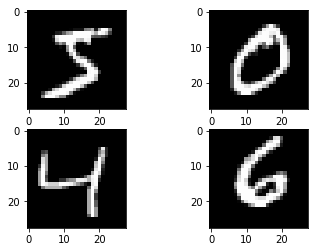

In [5]:
import matplotlib.pyplot as plt


plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[90], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

## 2. PREPROCESSING

In [6]:
# Setting the value the seed. You can set your seed to any value. A particular seed va
seed = 7
numpy.random.seed(seed)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [9]:
X_train.shape

(60000, 784)

In [10]:
# normalize inputs from 0-255 to 0-1. This is a standard practice 
X_train = X_train / 255
X_test = X_test / 255

In [11]:
# one hot encode outputs. ; 
#For eg. an output of '9' would be one-hot encoded to [0,0,0,0,0,0,0,0,1]
#'8' would be encoded to [0,0,0,0,0,0,0,0,1,0]

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## 3. MODELLING

This is where we define our Deep Learning Model. It's a small network . But still very powerful.

In [14]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu')) #HIDDEN LAYER
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax')) #Output Layer
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #Compile the model
	return model 

In [13]:
# build the model
model = baseline_model() #initialize the model using the fucntion we defined.
# Fit the model
fit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2793 - acc: 0.9206 - val_loss: 0.1419 - val_acc: 0.9570
Epoch 2/10
 - 5s - loss: 0.1117 - acc: 0.9676 - val_loss: 0.0920 - val_acc: 0.9709
Epoch 3/10
 - 5s - loss: 0.0718 - acc: 0.9798 - val_loss: 0.0785 - val_acc: 0.9774
Epoch 4/10
 - 6s - loss: 0.0503 - acc: 0.9857 - val_loss: 0.0741 - val_acc: 0.9776
Epoch 5/10
 - 6s - loss: 0.0371 - acc: 0.9894 - val_loss: 0.0677 - val_acc: 0.9790
Epoch 6/10
 - 6s - loss: 0.0268 - acc: 0.9929 - val_loss: 0.0625 - val_acc: 0.9808
Epoch 7/10
 - 6s - loss: 0.0208 - acc: 0.9947 - val_loss: 0.0628 - val_acc: 0.9810
Epoch 8/10
 - 6s - loss: 0.0140 - acc: 0.9972 - val_loss: 0.0625 - val_acc: 0.9803
Epoch 9/10
 - 6s - loss: 0.0107 - acc: 0.9979 - val_loss: 0.0599 - val_acc: 0.9810
Epoch 10/10
 - 6s - loss: 0.0077 - acc: 0.9985 - val_loss: 0.0608 - val_acc: 0.9814
Accuracy: 98.14%


In [12]:
def ABC():
    {
        
    }

### Final Evaluation of the Model

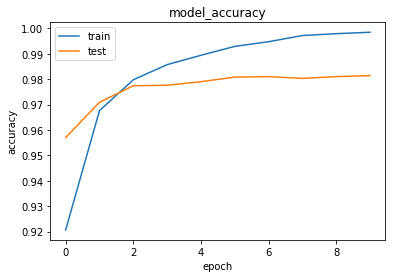

In [15]:
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

## PREDICT

Finally let's make some predictions :)

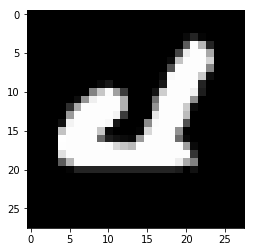

In [16]:
# Let's predict what is the first image of the test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_test[8000], cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
numpy.argmax(model.predict(X_test[8000].reshape(1,784)))

4

In [ ]:
model.predict(X_test[0].reshape(1,784))